In [ ]:
!mkdir -p /root/.kaggle/

In [ ]:
!mv kaggle.json /root/.kaggle/

In [ ]:
import kaggle

In [ ]:
!pip uninstall kaggle

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Would remove:
    /usr/local/bin/kaggle
    /usr/local/lib/python3.7/dist-packages/kaggle-1.5.12.dist-info/*
    /usr/local/lib/python3.7/dist-packages/kaggle/*
Proceed (y/n)? y
  Successfully uninstalled kaggle-1.5.12


In [ ]:
!pip install --upgrade kaggle

     |████████████████████████████████| 58 kB 5.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=b5d890ea442cd8af45686c4ffcc12da243e116c3c95a1a7178c514e88cc4c9dd
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [ ]:
!kaggle competitions download -c dog-breed-identification

 98% 675M/691M [00:11<00:00, 38.6MB/s]
100% 691M/691M [00:11<00:00, 61.2MB/s]


In [ ]:
! unzip -q dog-breed-identification.zip

In [ ]:
!rm -f dog-breed-identification.zip

In [ ]:
!ls train #import lable.csv in pd dataframe

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
lables= pd.read_csv("labels.csv")

In [ ]:
lables.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
#file name to Label mapping
lables['file_name']= lables['id']+'.jpg'

In [ ]:
lables.head()

id  ...                             file_name
0  000bec180eb18c7604dcecc8fe0dba07  ...  000bec180eb18c7604dcecc8fe0dba07.jpg
1  001513dfcb2ffafc82cccf4d8bbaba97  ...  001513dfcb2ffafc82cccf4d8bbaba97.jpg
2  001cdf01b096e06d78e9e5112d419397  ...  001cdf01b096e06d78e9e5112d419397.jpg
3  00214f311d5d2247d5dfe4fe24b2303d  ...  00214f311d5d2247d5dfe4fe24b2303d.jpg
4  0021f9ceb3235effd7fcde7f7538ed62  ...  0021f9ceb3235effd7fcde7f7538ed62.jpg

[5 rows x 3 columns]

In [ ]:
lables.breed.unique()


array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [ ]:
lables.breed.nunique()

120

In [ ]:
lables.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
brabancon_griffon        67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

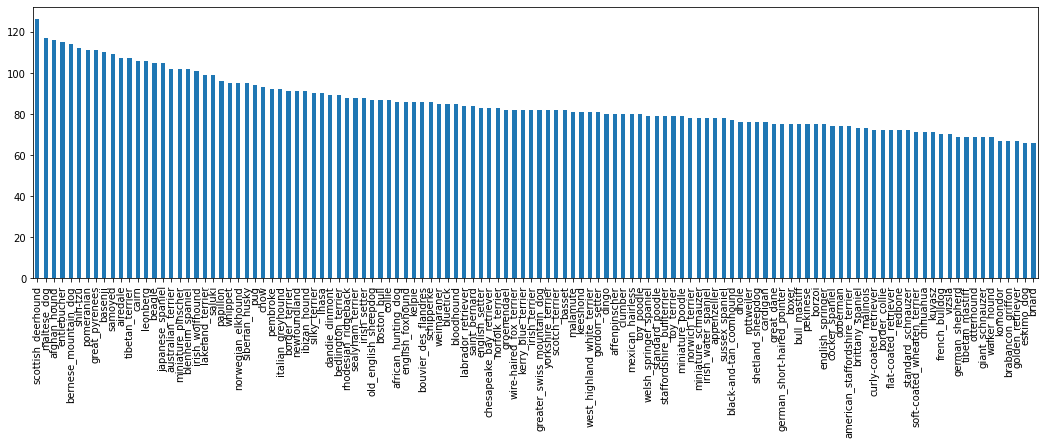

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 5))
lables.breed.value_counts().plot.bar()

### Images are unevenly distributed.  to fix that:-

1.under sampling
2.Over sampling (rare)
2.SMOTE

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
lables.shape

(10222, 3)

In [ ]:
idg = ImageDataGenerator(validation_split=0.1,rescale=1/255.0)


In [ ]:
train_generator= idg.flow_from_dataframe(lables,directory='train',x_col='file_name',y_col='breed',target_size=(150,150),batch_size=64,subset='training')

Found 9200 validated image filenames belonging to 120 classes.


In [ ]:
val_generator= idg.flow_from_dataframe(lables,directory='train',x_col='file_name',y_col='breed',target_size=(150,150),batch_size=64,subset='validation')

Found 1022 validated image filenames belonging to 120 classes.


In [ ]:
#new dta genrator for VGG check

val_vgg_generator= idg.flow_from_dataframe(lables,directory='train',x_col='file_name',y_col='breed',target_size=(224,224),batch_size=64,subset='validation')


Found 1022 validated image filenames belonging to 120 classes.


In [ ]:
##How to validate transfer learning
#1. Check if the  category is available in transfer learning model or not
#2.Not all categories will be available ..go for a super-category called as dog
#3.(optional) Run the  validation data VGG model.and check the result.vgg.predict



In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
vgg_full_model= VGG16()

In [ ]:
vgg_full_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
val_vgg_generator.n//val_vgg_generator.batch_size

15

In [ ]:
#vgg_full_model.predict_generator(val_vgg_generator)

In [ ]:
vgg_full_model.evaluate(val_vgg_generator, steps=15 )

RuntimeError: ignored

In [ ]:
# Fine Tunning - 
# You will freeze the first few Conv Layers and unfreeze the last Conv Layer with Dense too. 

# Transfer Learning - You were freezing the CNN layer and make new Dense layers 

# VGG 
# Chunck1 
# Chunck 2 
# Chunck 3 
# Chunck 4
# Chuck 5  - In Fine tuning we will unfreeze the last Conv Layer also 

# NOTE - 1. The 1-4 Convs should be freezed 
# 2. You will not directly unfreeze last Conv 
# 3. when you unfreeze the conv layer, you will lower your learning rate



# Process of Fine Tuning 
# 1. First cut of the Dense of VGG 
# 2. Apply your new Dense and train the model ( 'warm up' for new Dense Layers)
# 3. Unfreeze the last conv and lower your LR 
# 4. Continue the training again 

In [ ]:
vgg_model = VGG16(include_top=False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
for layer in vgg_model.layers:
  layer.trainable = False


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import categorical_crossentropy

In [ ]:
vgg_output = vgg_model.output
flat = Flatten()(vgg_output)
d1 = Dense(256, activation='relu')(flat)
d2 = Dense(120, activation='softmax')(d1)

In [ ]:
full_model = Model(inputs=[vgg_model.input], outputs=[d2])

In [ ]:
full_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
full_model.compile(SGD(), categorical_crossentropy, metrics=['acc'])

In [ ]:
# Train the model for some epochs to warm it up 
full_model.fit(train_generator, epochs=3)

Epoch 1/3
 11/144 [=>............................] - ETA: 20:09 - loss: 4.8864 - acc: 0.0114

KeyboardInterrupt: ignored

In [ ]:
for layer in full_model.layers:
  print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False
flatten True
dense True
dense_1 True


In [ ]:
for layer in full_model.layers[15:]:
  layer.trainable=True


In [ ]:
for layer in full_model.layers:
  print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True
flatten True
dense True
dense_1 True


In [ ]:
opt2=SGD(learning_rate=1e-4,momentum=0.9) #mo

In [ ]:
full_model.compile(opt2, categorical_crossentropy, metrics=['acc'])

In [ ]:
train_generator.reset()

In [ ]:
full_model.fit(train_generator, epochs=10)

Epoch 1/10
144/144 [==============================] - 1637s 11s/step - loss: 4.7980 - acc: 0.0124
Epoch 2/10
144/144 [==============================] - 1650s 11s/step - loss: 4.7531 - acc: 0.0189
Epoch 3/10
 27/144 [====>.........................] - ETA: 22:23 - loss: 4.7307 - acc: 0.0197